In [1]:
%cd ../..

c:\Users\maher\Unsupervised-anomaly-detection-on-noisy-time-series-data-for-accurate-load-forecasting


In [2]:
import torch
import matplotlib.pyplot as plt

from feature_extractor import LSTM_AE
from dataset import TS_Dataset

In [3]:
dataset_root = "data/inpg_dataset/npy_data/"
batch_size = 32
train_dataset = TS_Dataset(dataset_root, "train")

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
) # both train and test datasets contain anomalies

test_dataset = TS_Dataset(dataset_root, "test")
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
)

In [4]:
print(f"nbr of train samples: {len(train_dataset)*batch_size}")

nbr of train samples: 18048


epoch : 1, loss_mean : 20.7399631
epoch : 2, loss_mean : 20.5473830
epoch : 3, loss_mean : 18.7044020
epoch : 4, loss_mean : 18.8710565
epoch : 5, loss_mean : 16.4939681
epoch : 6, loss_mean : 16.2184535
epoch : 7, loss_mean : 16.2280107
epoch : 8, loss_mean : 15.4125803
epoch : 9, loss_mean : 15.3699718
epoch : 10, loss_mean : 14.8199114
epoch : 11, loss_mean : 14.9961736
epoch : 12, loss_mean : 14.3461528
epoch : 13, loss_mean : 14.6301305
epoch : 14, loss_mean : 14.2104703
epoch : 15, loss_mean : 14.1894467
epoch : 16, loss_mean : 13.6334994
epoch : 17, loss_mean : 13.3107990
epoch : 18, loss_mean : 13.0985361
epoch : 19, loss_mean : 12.5523769
epoch : 20, loss_mean : 12.4728460
epoch : 21, loss_mean : 12.1143128
epoch : 22, loss_mean : 12.0306927
epoch : 23, loss_mean : 12.0942224
epoch : 24, loss_mean : 11.8267964
epoch : 25, loss_mean : 12.1063273
epoch : 26, loss_mean : 11.4665810
epoch : 27, loss_mean : 11.3008903
epoch : 28, loss_mean : 11.3690776
epoch : 29, loss_mean : 10.74

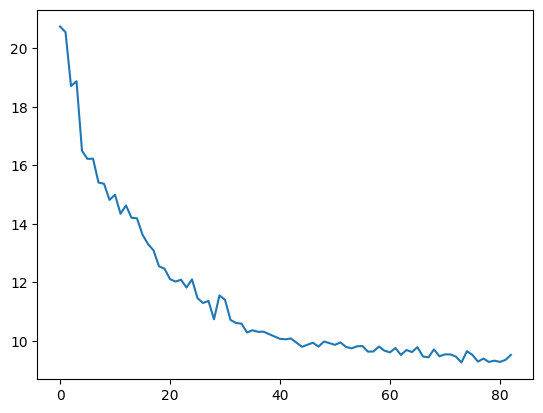

In [11]:
seq_len = 24*3
nbr_variables = 1
embedding_dim = seq_len
learning_rate = 1e-3
every_epoch_print = 1
epochs = 200
patience = 10
max_grad_norm = 0.05
checkpoint_path = "anomaly-detection/checkpoint.pt"

model = LSTM_AE(seq_len, nbr_variables, embedding_dim, learning_rate, every_epoch_print, epochs, patience, max_grad_norm, checkpoint_path=checkpoint_path)
loss_history = model.fit(train_dataloader)

plt.plot(loss_history)

In [13]:
loaded_model = LSTM_AE(seq_len, nbr_variables, embedding_dim, learning_rate, every_epoch_print, epochs, patience, max_grad_norm)
loaded_model.load(checkpoint_path)

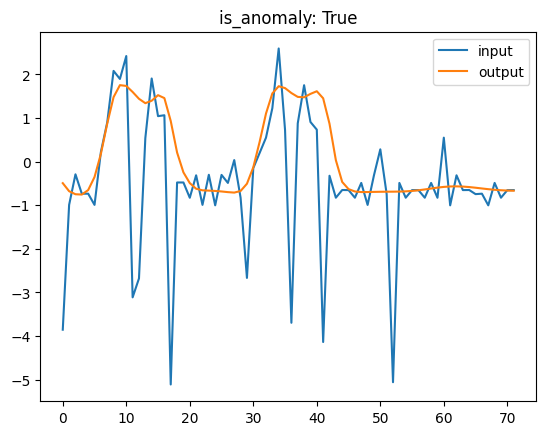

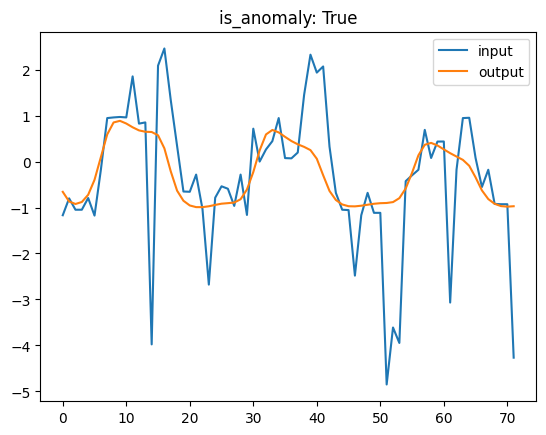

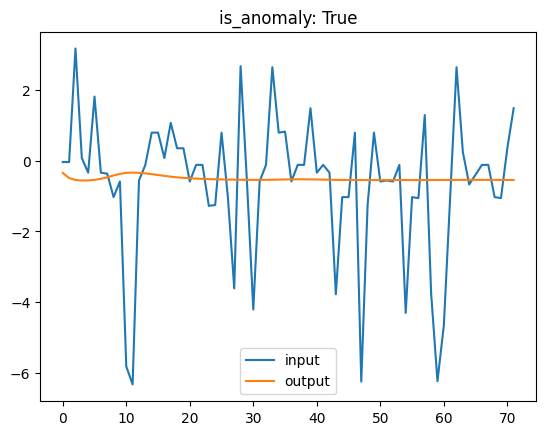

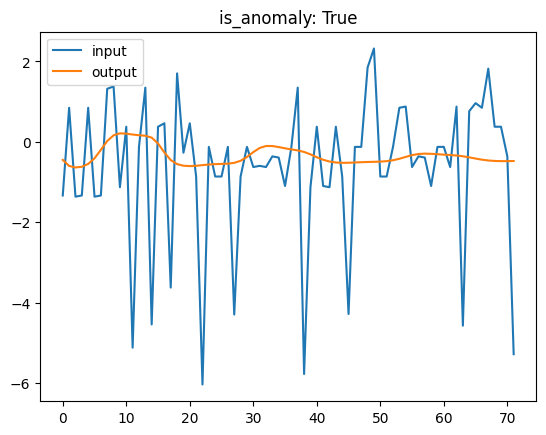

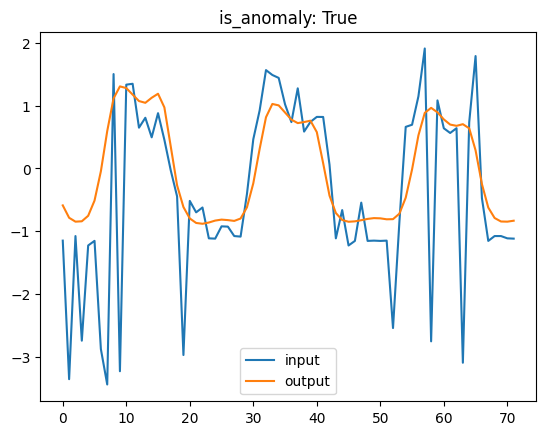

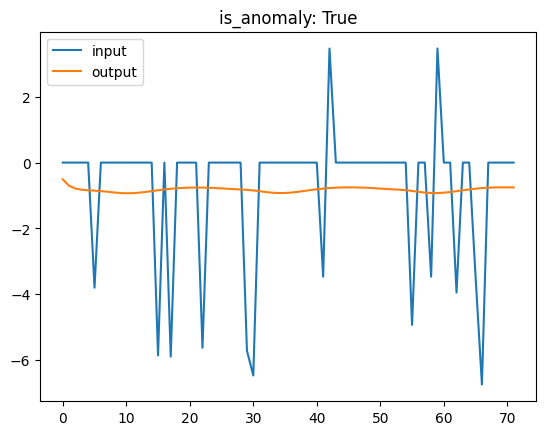

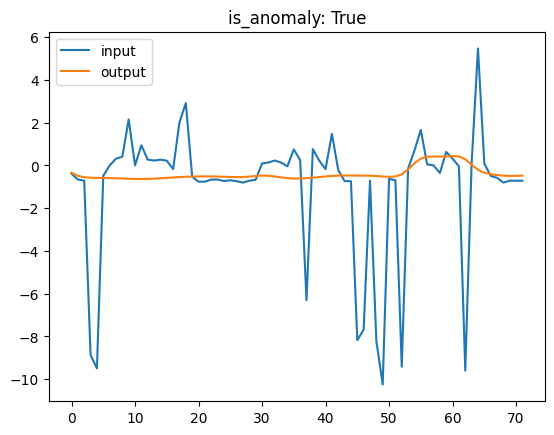

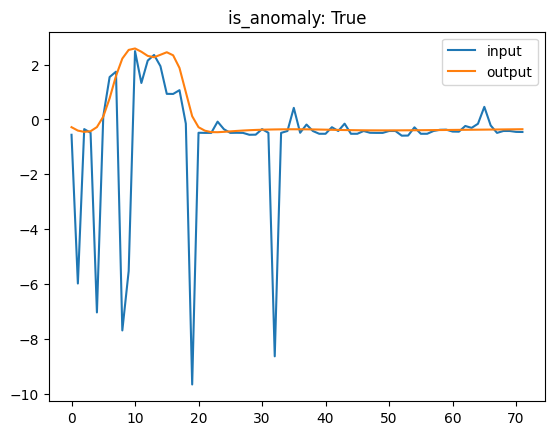

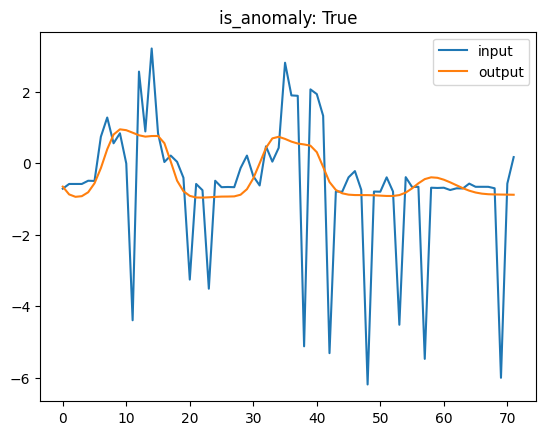

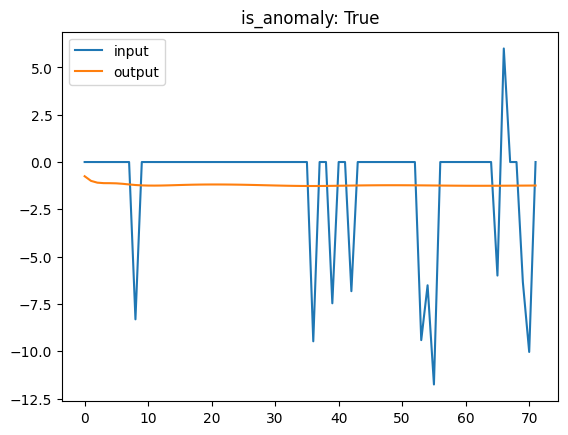

In [15]:
k = 0
flag = 0
for batch_idx, batch in enumerate(test_dataloader):
    batch_data = batch["data"]
    gt = batch["is_anomaly"]
    encoded_batch, decoded_batch = loaded_model(batch_data)
    for data_sample, decoded_sample, is_anomaly in zip(batch_data, decoded_batch, gt):
        if not is_anomaly: continue
        plt.clf()
        plt.title(f"is_anomaly: {is_anomaly}")
        plt.plot(data_sample.squeeze().cpu().data, label="input")
        plt.plot(decoded_sample.cpu().data, label="output")
        plt.legend()
        plt.show()
        k += 1
        if k>=10: 
            flag = 1
            break
    if flag: break